# Abstraction data Boxmeer and Vierlingsbeek

*R.A. Collenteur, University of Graz, January 2021*

The groundwater abstraction data has been obtained from the NHI-GWO Database (Accessed 25-10-2017). Here we provide time series for the total abstraction rates at the two pumping station that are present in the study area Vierlingsbeek and Boxmeer. 

**Disclaimer**: Data is published with permission from the drinking water company [Brabant Water](https://www.brabantwater.nl). Please acknowledge Brabant Water when using this data for any purposes.

In [1]:
import pandas as pd
from pandas.tseries.frequencies import to_offset

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
gwa_bm = pd.read_csv("abstraction_boxmeer.csv", index_col=0, parse_dates=True, squeeze=True)
gwa_vb = pd.read_csv("abstraction_vierlingsbeek.csv", index_col=0, parse_dates=True, squeeze=True)

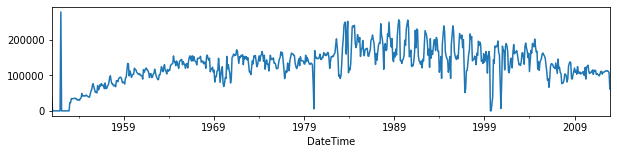

In [3]:
gwa_bm.plot(figsize=(10,2));

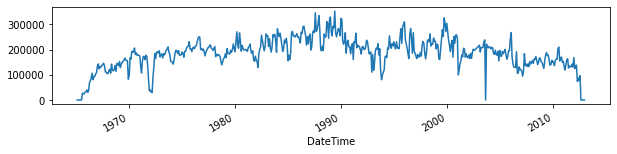

In [4]:
gwa_vb.plot(figsize=(10,2));

## Resample to daily values
The original data is provided as total abstraction per month. Since we often require data at smaller and regular time intervals the data is transformed to daily sums in the code below. This is done by dividing the monthly sums over the number of days in each month. This also gives the time series a regular time step. These time series are also stored as csv-files for easy access to the data. 

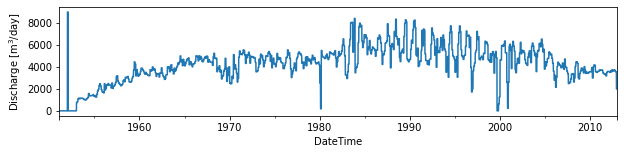

In [5]:
freq = "D"
dt = gwa_bm.index.to_series().diff() / to_offset(freq).delta
gwa_bm = gwa_bm / dt
gwa_bm = gwa_bm.asfreq(freq, method="bfill")

gwa_bm.plot(figsize=(10,2));
plt.ylabel("Discharge [m$^3$/day]")
gwa_bm.to_csv("abstraction_boxmeer_daily.csv")

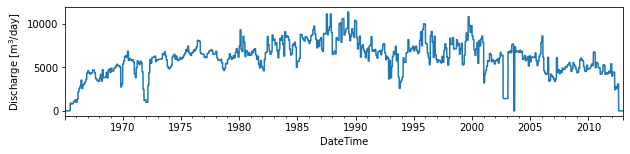

In [6]:
freq = "D"
dt = gwa_vb.index.to_series().diff() / to_offset(freq).delta
gwa_vb = gwa_vb / dt
gwa_vb = gwa_vb.asfreq(freq, method="bfill")

gwa_vb.plot(figsize=(10,2));
plt.ylabel("Discharge [m$^3$/day]")
gwa_vb.to_csv("abstraction_vierlingsbeek_daily.csv")